In [18]:
!pip install openpyxl


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
import pandas as pd

# Загрузка файла
df = pd.read_excel("shymkentmeteodata.xlsx")  # Замени на своё имя файла

# Удаляем лишние кавычки из названий колонок
df.columns = df.columns.str.replace('"', '').str.strip()

# Заменяем запятые на точки во всех строках, затем приводим к числам
for col in df.columns:
    if col != "Date":
        df[col] = df[col].astype(str).str.replace(',', '.', regex=False)
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Преобразуем дату
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)

# Сохраняем чистый файл
df.to_excel("shymkent_cleaned.xlsx", index=False)

df.head()


,Date,Precipitation,AirTemp_Avg,AirTemp_Max,AirTemp_Min,Humidity_Avg,Humidity_Min,WindSpeed_Avg,WindSpeed_Max,Cloud_O,Cloud_H,SoilTemp_Avg,SoilTemp_Max,SoilTemp_Min,SaturationDeficit_Avg,SaturationDeficit_Max
0,2010-01-01,0.0,9.4,16.7,2.1,57,31,1.5,2,5,7,5,20,-2.0,5.6,12.9
1,2010-01-02,0.0,9.8,18.0,3.8,58,28,1.6,2,2,6,5,16,1.0,5.7,13.7
2,2010-01-03,0.3,9.1,14.1,4.7,61,48,1.1,3,2,6,5,11,0.0,4.7,7.9
3,2010-01-04,0.0,13.2,17.6,9.3,44,29,3.1,6,2,6,8,17,0.0,8.9,13.4
4,2010-01-05,2.4,11.6,18.7,8.7,60,41,2.5,4,3,3,8,24,3.0,5.9,11.7


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Загрузка очищенного файла
df = pd.read_excel("shymkent_cleaned.xlsx")

In [25]:
# Создание метки засухи (если осадки < 1 мм — засуха)
df["Drought"] = (df["Precipitation"] < 1).astype(int)

In [26]:
# Удалим строки с пропущенными значениями
df = df.dropna()

In [27]:
# Выбор признаков
features = df.drop(columns=["Date", "Drought"])
target = df["Drought"]

In [28]:
# Разделение на train/test
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [29]:
# Модель
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [30]:
# Предсказание
y_pred = model.predict(X_test)

In [31]:
# Метрики
print("📊 Classification Report:\n", classification_report(y_test, y_pred))
print("🧩 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

📊 Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       235
           1       1.00      1.00      1.00       848

    accuracy                           1.00      1083
   macro avg       1.00      1.00      1.00      1083
weighted avg       1.00      1.00      1.00      1083

🧩 Confusion Matrix:
 [[235   0]
 [  0 848]]


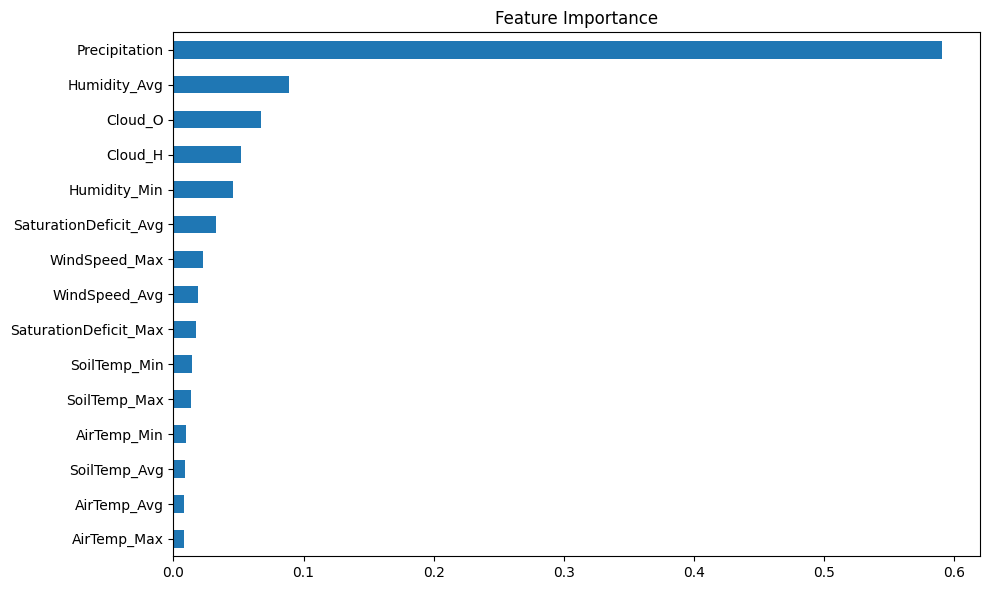

In [32]:
# Визуализация важности признаков
importances = pd.Series(model.feature_importances_, index=features.columns)
importances.sort_values().plot(kind="barh", figsize=(10, 6), title="Feature Importance")
plt.tight_layout()
plt.show()